<a href="https://colab.research.google.com/github/EmmanuelKnows/DS-Codveda/blob/main/Classification_with_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification with Logistic Regression

## Import Libraries and dependencies

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

## Data Loading and Exploration

We load and view the dataset

In [16]:
# Load the dataset
df = pd.read_csv('iris.csv')

# View dataset
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


Inspect dataset to understand its features ($X$) and the target variable ($y$).

In [17]:
# Inspect the first few rows and data types
print(df.head())
print('--------------------------------------------------')
print(df.info())
print('--------------------------------------------------')
print(df.describe())
print('--------------------------------------------------')
print(df['species'].value_counts())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
--------------------------------------------------
       sepal_length  sepal_width  petal_length  peta

## Data Preprocessing
Machine learning models require numerical input. We must convert categories to numbers and scale the features.

**Label Encoding:** Converts species names (Setosa, etc.) into numbers (0, 1, 2).

**Train-Test Split:** We set aside 30% of the data to test the model's performance on unseen data.

**Feature Scaling:** Logistic Regression uses gradient descent; scaling features to have a mean of 0 and standard deviation of 1 (Standardization) helps the model converge faster.

In [18]:
# Separate features and target
X = df.drop('species', axis=1)
y = df['species']

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split into training and testing sets (70% Train, 30% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Train and Evaluate Logistic Regression

We use the One-Vs-Rest (OvR) strategy, which is standard for multi-class logistic regression.

In [19]:
# Initialize and train
log_reg = LogisticRegression(multi_class='ovr')
log_reg.fit(X_train_scaled, y_train)

print('Initialized and Traied')


Initialized and Traied


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [20]:
# Make predictions
y_pred = log_reg.predict(X_test_scaled)

print('Predictions Made')

Predictions Made


In [24]:
# Evaluate / Calculate Metrics

# For multi-class, we use average='macro' to compute the unweighted mean per class
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.8444
Precision: 0.8452
Recall: 0.8444


In [23]:
# Detailed report showing results for each specific flower
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Detailed Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.79      0.73      0.76        15
   virginica       0.75      0.80      0.77        15

    accuracy                           0.84        45
   macro avg       0.85      0.84      0.84        45
weighted avg       0.85      0.84      0.84        45



## Comparison with Random Forest

To see how a linear model compares to an ensemble model, we train a Random Forest Classifier.

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_scaled, y_train)

# Compare Accuracy
print(f"Random Forest Accuracy: {rf_clf.score(X_test_scaled, y_test):.4f}")

Random Forest Accuracy: 0.8889


## Script of Logistic Regression Classification with ROC curve Analysis

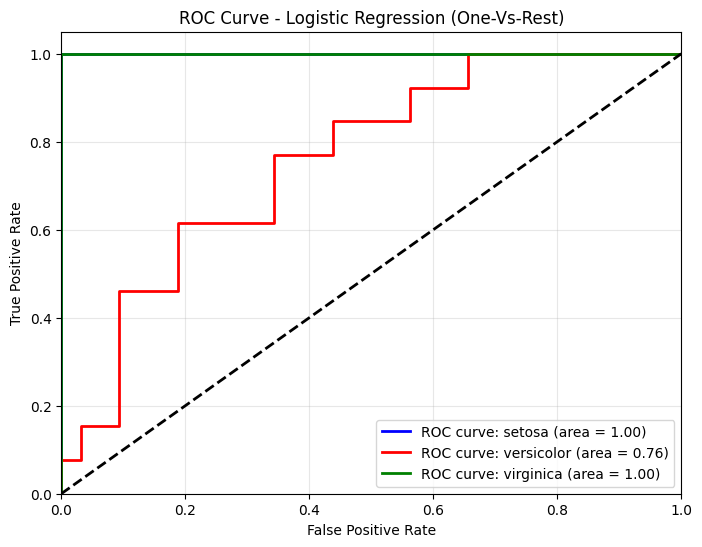

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize, StandardScaler, LabelEncoder
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

# Load dataset
df = pd.read_csv('iris.csv')
X = df.drop('species', axis=1)
y = df['species']

# Binarize the output for multi-class ROC
le = LabelEncoder()
y_encoded = le.fit_transform(y)
classes = le.classes_
n_classes = len(classes)
y_bin = label_binarize(y_encoded, classes=[0, 1, 2])

# Split and Scale
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train One-Vs-Rest Logistic Regression
classifier = OneVsRestClassifier(LogisticRegression())
y_score = classifier.fit(X_train_scaled, y_train).decision_function(X_test_scaled)

# Compute ROC curve and AUC for each class
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve: {classes[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression (One-Vs-Rest)')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()